# Welcome! to Breast Cancer Classification 

## Attribute Information:

-  ID number 
- Diagnosis (M = malignant, B = benign)

### Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

##  Importing libraries

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## Load the data

In [4]:
df = pd.read_csv("datasets/data.csv")

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

1st we going to drop Id becouse it does not impact prediction
and Unnamed: 32 becouse it have lots of missing values

In [7]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Diagnosis (M = malignant, B = benign)
here we going to label encoding (M=1 & B=0)

In [9]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Using info() we can see three is no Nan values and all features are numerical**

In [13]:
df.shape

(569, 31)

In [14]:
#counting duplicate 

df.duplicated().sum()

0

So here you can see three is no duplicate value found

## Exploratory Data Analysis (EDA)

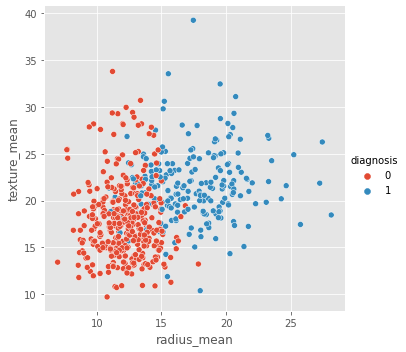

In [15]:
#relating vareiable plot

sns.relplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=df);

by the above plot you can findout relationship between features and outcome

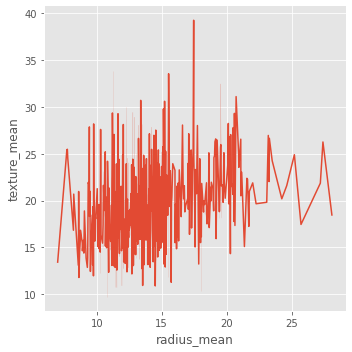

In [16]:
#aggegation and representing uncertainty
sns.relplot(x="radius_mean",y="texture_mean",kind="line",data=df)

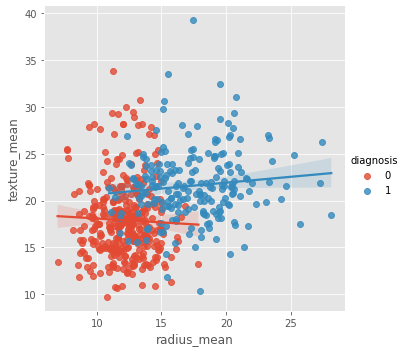

In [17]:
#how does the relationship between two variable chance as fuction of a thired variable

sns.lmplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=df);

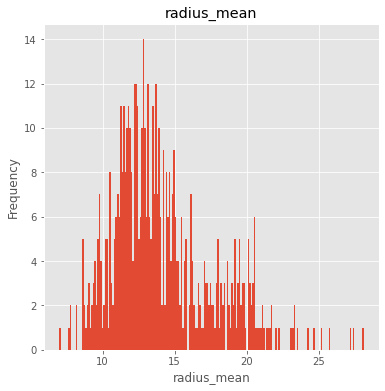

In [18]:
#here we going to plot histogram for see frequency dist
df["radius_mean"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")
plt.show()

## Swarm plot

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

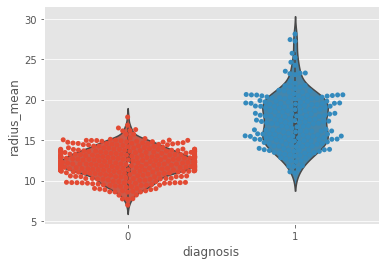

In [19]:
sns.violinplot(x="diagnosis",y="radius_mean",data=df)
sns.swarmplot(x="diagnosis",y="radius_mean",data=df)

# Pair plot

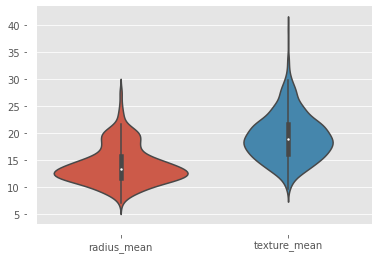

In [20]:
#here wr checking outliers 
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,1:3])
sns.despine(offset=10,trim=True)

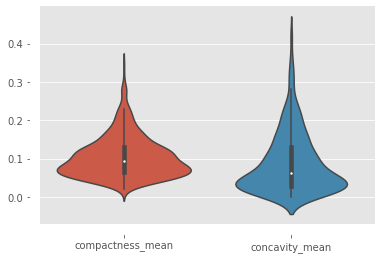

In [21]:
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,6:8])
sns.despine(offset=10,trim=True)

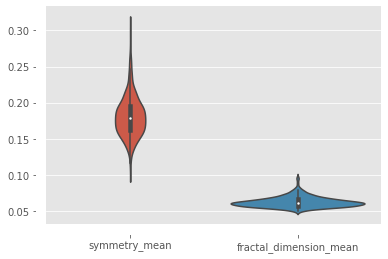

In [22]:
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,9:11])
sns.despine(offset=10,trim=True)

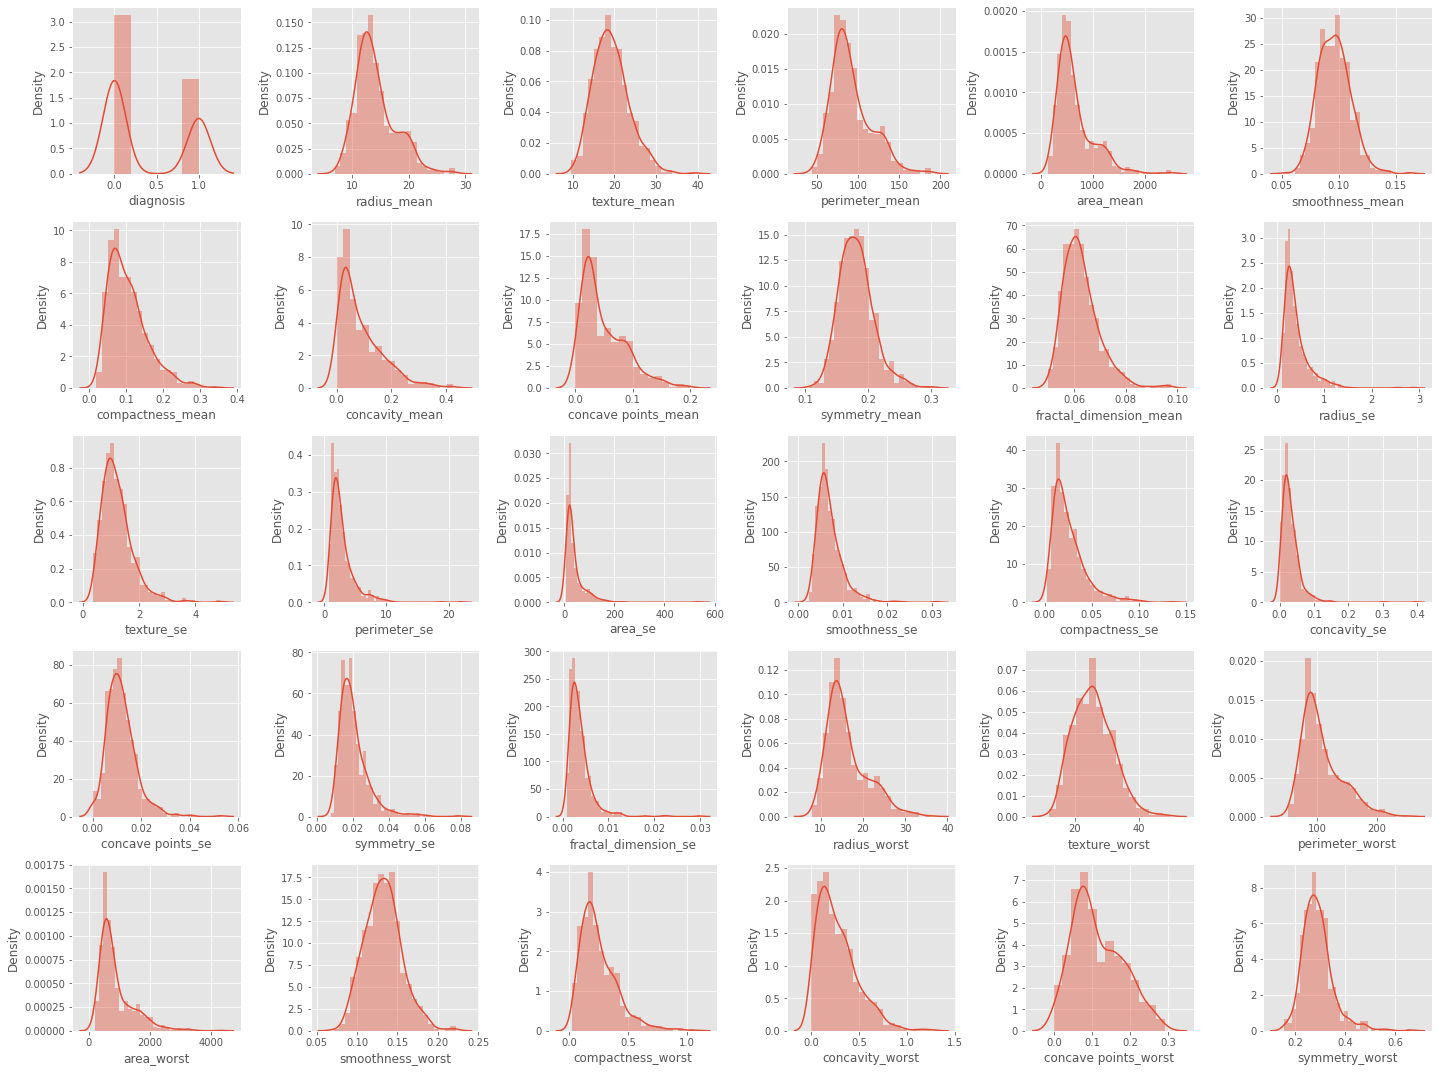

In [23]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**By the above plot we can see data distribution and also identify outliers**

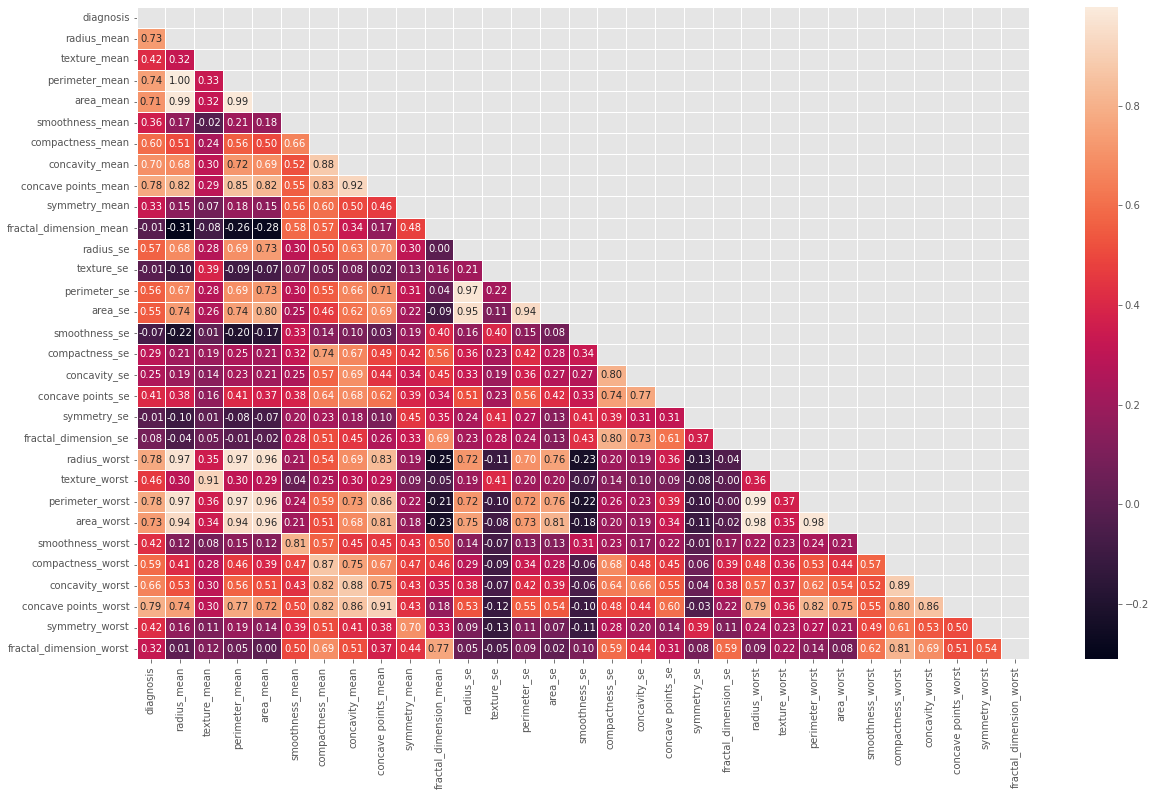

In [24]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [25]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


# #  dealing with Outliers

In [26]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

In [27]:
# creating features and label 

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [28]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

**using StandardScaler to scal the data**

In [29]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [30]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# model predictions

y_pred = log_reg.predict(X_test)

In [32]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9766081871345029


In [33]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[107   1]
 [  3  60]]


In [34]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# K Neighbors Classifier (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# model predictions 

y_pred = knn.predict(X_test)

In [37]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9698492462311558
0.935672514619883


In [38]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[105   3]
 [  8  55]]


In [39]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



# Support Vector Classifier (SVC)

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [41]:
# best parameters

grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [42]:
svc = SVC(C = 15, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01)

In [43]:
# model predictions 

y_pred = svc.predict(X_test)

In [44]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9899497487437185
0.9883040935672515


<AxesSubplot:>

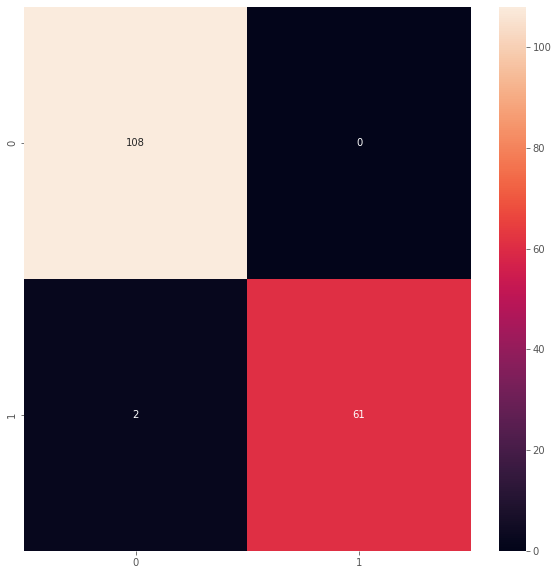

In [45]:
# confusion matrix

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix,annot=True,fmt='d')

In [46]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



# SGD Classifier

In [47]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [48]:
# best parameter 

grid_search.best_params_

{'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}

In [49]:
sgd = SGDClassifier(alpha = 0.01, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log')

In [50]:
# model predictions 

y_pred = sgd.predict(X_test)

In [51]:
# accuracy score

print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.9874371859296482
0.9707602339181286


In [52]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto',
                                  min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [54]:
y_pred = rand_clf.predict(X_test)

In [55]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9949748743718593
0.9649122807017544


In [56]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [58]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

In [59]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=180)

In [60]:
y_pred = gbc.predict(X_test)

In [61]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.9883040935672515


In [62]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



# Extreme Gradient Boosting

In [63]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

[01:48:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred = xgb.predict(X_test)

In [65]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

1.0
0.9824561403508771


In [66]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [67]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Random Forest Classifier', 
            'Gradient Boosting Classifier','XgBoost'],
    'Score': [log_reg_acc, knn_acc, svc_acc, sgd_acc,ran_clf_acc, gbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.988304
5,Gradient Boosting Classifier,0.988304
6,XgBoost,0.982456
0,Logistic Regression,0.976608
3,SGD Classifier,0.970760
4,Random Forest Classifier,0.964912
1,KNN,0.935673


### Best model for diagnosing breast cancer is "Support Vector Classifier" with an accuracy of 98.9%.